In [1]:
import math
import numpy as np

import matplotlib.pyplot as plt


In [2]:
mu1 = np.array([1, 0])
mu2 = np.array([-1, 0])
mu3 = np.array([0, -10])

val = 1/math.sqrt(2)
U = np.array([[val, -val], [val, val]])
D1 = np.array([[4, 0], [0, 1]])
D2 = np.array([[1, 0], [0, 5]])

sigma1 = U @ D1 @ U.T
sigma2 = U @ D2 @ U.T
sigma3 = np.eye(2)

In [3]:
# Create 3 clusters of data, where samples in each cluster are normally distributed
x1 = np.random.multivariate_normal(mu1, sigma1, size=1000)
x2 = np.random.multivariate_normal(mu2, sigma2, size=1000)
x3 = np.random.multivariate_normal(mu3, sigma3, size=1000)

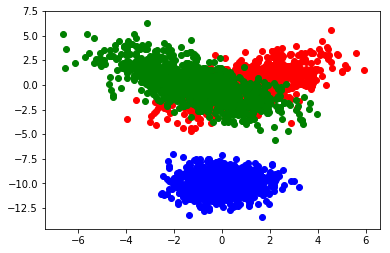

In [7]:
plt.scatter(x1[:,0], x1[:,1], c='r')
plt.scatter(x2[:,0], x2[:,1], c='g')
plt.scatter(x3[:,0], x3[:,1], c='b')
plt.show()

In [30]:
def kmeans(data, k):
    # randomly initialize clusters
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    prev_splits = None
    splits = np.array_split(indices, k)
    
    while True:
        means = [np.average(data[splits[i],:], axis=0) for i in range(k)]
        splits = [[] for i in range(k)]
        for i, p in enumerate(data):
            distances = [np.linalg.norm(p - m) for m in means]
            index = np.argmin(distances)
            splits[index].append(i)
        splits = np.array(splits)
        if prev_splits is not None and np.array_equal(splits, prev_splits):
            break
        prev_splits = splits
    return splits

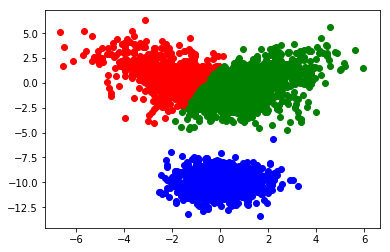

In [38]:
data = np.vstack((x1, x2, x3))
splits = kmeans(data, 3)

colors = ['r', 'g', 'b']
for split, color in zip(splits, colors):
    cluster_data = data[split,:]
    plt.scatter(cluster_data[:,0], cluster_data[:,1], c=color)
plt.show()